In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [3]:
df = pd.read_csv(r'C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\SVM_Numerical\HR_comma_sep.csv')

In [4]:
print(df.columns)
df.info()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memo

In [5]:
df = df.sample(frac=1, random_state=27).reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.96,0.76,4,158,3,0,0,0,IT,low
1,0.50,0.77,4,180,3,0,0,0,sales,medium
2,0.59,0.73,4,247,10,0,0,0,management,high
3,0.74,0.89,5,229,6,0,1,0,support,low
4,0.43,0.39,5,198,5,0,0,0,RandD,medium
...,...,...,...,...,...,...,...,...,...,...
14994,0.14,0.83,5,171,6,0,0,0,technical,medium
14995,0.41,0.49,2,147,3,0,1,0,sales,low
14996,0.44,0.57,5,183,2,1,0,0,sales,low
14997,0.54,0.80,3,232,2,0,0,0,accounting,high


In [6]:
print(df['salary'].unique())
print(df['Department'].unique())

['low' 'medium' 'high']
['IT' 'sales' 'management' 'support' 'RandD' 'technical' 'hr' 'marketing'
 'product_mng' 'accounting']


In [7]:
df = df.replace({'salary' :{'low':0,'medium':1,'high':2}})

In [8]:
print(df['salary'].unique())

[0 1 2]


In [9]:
df = pd.get_dummies(df, drop_first=False)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.96,0.76,4,158,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.50,0.77,4,180,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.59,0.73,4,247,10,0,0,0,2,0,0,0,0,1,0,0,0,0,0
3,0.74,0.89,5,229,6,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.43,0.39,5,198,5,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.14,0.83,5,171,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14995,0.41,0.49,2,147,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
14996,0.44,0.57,5,183,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
14997,0.54,0.80,3,232,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0


In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [11]:
df = df.drop('Department_RandD', axis = 1)

In [12]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'salary', 'Department_IT', 'Department_accounting',
        'Department_hr', 'Department_management', 'Department_marketing',
        'Department_product_mng', 'Department_sales', 'Department_support',
        'Department_technical', 'left']

In [13]:
df = df[cols]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.96,0.76,4,158,3,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.50,0.77,4,180,3,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.59,0.73,4,247,10,0,0,2,0,0,0,1,0,0,0,0,0,0
3,0.74,0.89,5,229,6,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0.43,0.39,5,198,5,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
corrM = df.corr()
corrM

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022,0.006373,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002,0.001269,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803,0.003287,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242,0.006967,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715,-0.006053,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247,-0.009293,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119,-0.038942,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.061788
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000,-0.010959,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630,-0.157898
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.010959,1.000000,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.010925
Department_accounting,-0.028649,0.002193,0.004189,0.000524,0.003909,-0.012836,-0.004852,0.012759,-0.069293,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,0.015201


<AxesSubplot:>

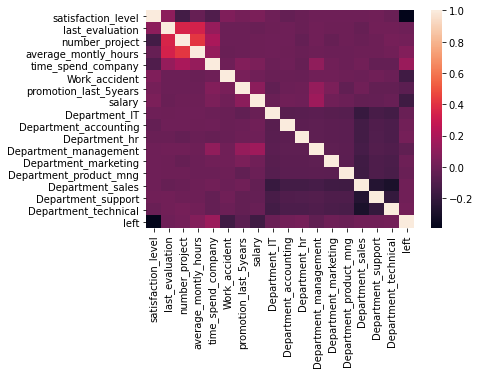

In [15]:
sns.heatmap(corrM, annot=False)

In [16]:
print(df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left']].skew())

satisfaction_level       -0.476360
last_evaluation          -0.026622
number_project            0.337706
average_montly_hours      0.052842
time_spend_company        1.853319
Work_accident             2.021149
promotion_last_5years     6.636968
salary                    0.598882
Department_IT             3.052062
Department_accounting     4.075859
Department_hr             4.165530
Department_management     4.566832
Department_marketing      3.813782
Department_product_mng    3.700720
Department_sales          1.002197
Department_support        1.975945
Department_technical      1.654207
left                      1.230043
dtype: float64


In [17]:
print(df['time_spend_company'].describe())

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64


<AxesSubplot:>

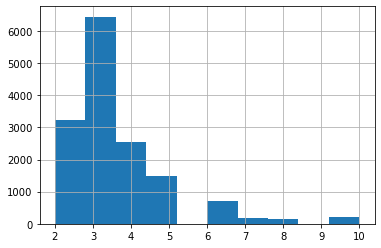

In [18]:
df.time_spend_company.hist()

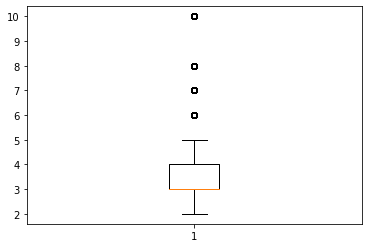

In [19]:
plt.boxplot(df["time_spend_company"])
plt.show()

In [20]:
print(df['Work_accident'].describe())

count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64


<AxesSubplot:>

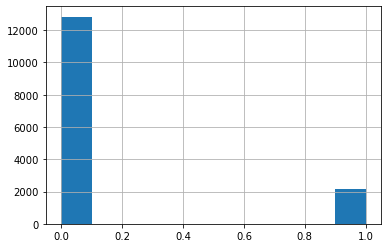

In [21]:
df.Work_accident.hist()

<AxesSubplot:>

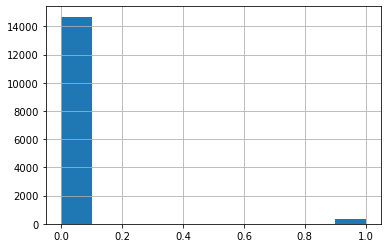

In [22]:
df.promotion_last_5years.hist()

In [23]:
print(df['promotion_last_5years'].describe())

count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64


In [24]:
def outlier(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    Min=Q1-1.5*IQR
    Max=Q3+1.5*IQR
    Floor=df[feature].quantile(0.10)
    Cap=df[feature].quantile(0.90)
    df[feature]=np.where(df[feature] < Min,Floor,df[feature])
    df[feature]=np.where(df[feature] > Max,Cap,df[feature])

In [25]:
outlier('time_spend_company')

<AxesSubplot:>

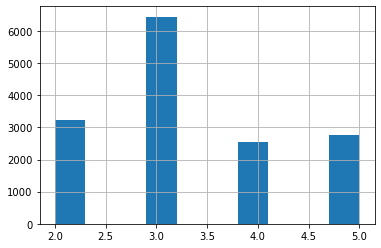

In [26]:
df.time_spend_company.hist()

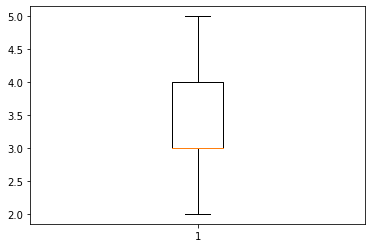

In [27]:
plt.boxplot(df["time_spend_company"])
plt.show()

In [28]:
#df = df.drop( axis=1)

In [29]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left'],
      dtype='object')

In [30]:
feature= df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'salary',
       'Department_IT', 'Department_accounting', 'Department_hr',
       'promotion_last_5years', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical']]
X=np.asarray(feature)
y=np.asarray(df['left'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
1199
print(X_test.shape)
print(y_test.shape)

(11999, 17)
(11999,)
(3000, 17)
(3000,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
model = tf.keras.Sequential()

model.add(Dense(5, input_dim=17, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opti = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opti,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
#checkpoint to hold the best weights found yet
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
#here we train the model
historic = model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=500, verbose=1, callbacks=[checkpoint])

Epoch 1/500
315/338 [==========================>...] - ETA: 0s - loss: 0.6677 - accuracy: 0.6445
Epoch 00001: val_loss improved from inf to 0.53488, saving model to weights.h5
338/338 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.6503 - val_loss: 0.5349 - val_accuracy: 0.7625
Epoch 2/500
301/338 [=========================>....] - ETA: 0s - loss: 0.4917 - accuracy: 0.7557
Epoch 00002: val_loss improved from 0.53488 to 0.42664, saving model to weights.h5
338/338 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.7564 - val_loss: 0.4266 - val_accuracy: 0.7783
Epoch 3/500
326/338 [===========================>..] - ETA: 0s - loss: 0.4016 - accuracy: 0.7788
Epoch 00003: val_loss improved from 0.42664 to 0.33976, saving model to weights.h5
338/338 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.7790 - val_loss: 0.3398 - val_accuracy: 0.8292
Epoch 4/500
309/338 [==========================>...] - ETA: 0s - loss: 

Epoch 28/500
315/338 [==========================>...] - ETA: 0s - loss: 0.1401 - accuracy: 0.9589
Epoch 00028: val_loss improved from 0.14443 to 0.14421, saving model to weights.h5
338/338 [==============================] - 7s 22ms/step - loss: 0.1415 - accuracy: 0.9588 - val_loss: 0.1442 - val_accuracy: 0.9542
Epoch 29/500
317/338 [===========================>..] - ETA: 0s - loss: 0.1387 - accuracy: 0.9600
Epoch 00029: val_loss improved from 0.14421 to 0.14307, saving model to weights.h5
338/338 [==============================] - 4s 12ms/step - loss: 0.1407 - accuracy: 0.9594 - val_loss: 0.1431 - val_accuracy: 0.9558
Epoch 30/500
308/338 [==========================>...] - ETA: 0s - loss: 0.1367 - accuracy: 0.9611
Epoch 00030: val_loss improved from 0.14307 to 0.14185, saving model to weights.h5
338/338 [==============================] - 1s 2ms/step - loss: 0.1398 - accuracy: 0.9599 - val_loss: 0.1419 - val_accuracy: 0.9550
Epoch 31/500
336/338 [============================>.] - ETA: 0

Epoch 56/500
331/338 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9637
Epoch 00056: val_loss did not improve from 0.13541
338/338 [==============================] - 1s 2ms/step - loss: 0.1305 - accuracy: 0.9634 - val_loss: 0.1377 - val_accuracy: 0.9575
Epoch 57/500
308/338 [==========================>...] - ETA: 0s - loss: 0.1293 - accuracy: 0.9635
Epoch 00057: val_loss improved from 0.13541 to 0.13517, saving model to weights.h5
338/338 [==============================] - 1s 2ms/step - loss: 0.1305 - accuracy: 0.9631 - val_loss: 0.1352 - val_accuracy: 0.9592
Epoch 58/500
304/338 [=========================>....] - ETA: 0s - loss: 0.1280 - accuracy: 0.9640
Epoch 00058: val_loss did not improve from 0.13517
338/338 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9631 - val_loss: 0.1399 - val_accuracy: 0.9583
Epoch 59/500
331/338 [============================>.] - ETA: 0s - loss: 0.1311 - accuracy: 0.9628
Epoch 00059: val_loss did not 

Epoch 85/500
329/338 [============================>.] - ETA: 0s - loss: 0.1276 - accuracy: 0.9628
Epoch 00085: val_loss did not improve from 0.13222
338/338 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9629 - val_loss: 0.1341 - val_accuracy: 0.9592
Epoch 86/500
333/338 [============================>.] - ETA: 0s - loss: 0.1274 - accuracy: 0.9635
Epoch 00086: val_loss did not improve from 0.13222
338/338 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9634 - val_loss: 0.1336 - val_accuracy: 0.9600
Epoch 87/500
336/338 [============================>.] - ETA: 0s - loss: 0.1274 - accuracy: 0.9637
Epoch 00087: val_loss did not improve from 0.13222
338/338 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9637 - val_loss: 0.1356 - val_accuracy: 0.9592
Epoch 88/500
337/338 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 0.9629
Epoch 00088: val_loss did not improve from 0.13222
338/338 [==

Epoch 114/500
320/338 [===========================>..] - ETA: 0s - loss: 0.1282 - accuracy: 0.9631
Epoch 00114: val_loss did not improve from 0.13090
338/338 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9638 - val_loss: 0.1322 - val_accuracy: 0.9583
Epoch 115/500
306/338 [==========================>...] - ETA: 0s - loss: 0.1274 - accuracy: 0.9642
Epoch 00115: val_loss did not improve from 0.13090
338/338 [==============================] - 1s 1ms/step - loss: 0.1260 - accuracy: 0.9642 - val_loss: 0.1356 - val_accuracy: 0.9575
Epoch 116/500
299/338 [=========================>....] - ETA: 0s - loss: 0.1248 - accuracy: 0.9636
Epoch 00116: val_loss did not improve from 0.13090
338/338 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9635 - val_loss: 0.1324 - val_accuracy: 0.9592
Epoch 117/500
337/338 [============================>.] - ETA: 0s - loss: 0.1257 - accuracy: 0.9636
Epoch 00117: val_loss did not improve from 0.13090
338/338

Epoch 143/500
337/338 [============================>.] - ETA: 0s - loss: 0.1251 - accuracy: 0.9639
Epoch 00143: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9640 - val_loss: 0.1335 - val_accuracy: 0.9567
Epoch 144/500
335/338 [============================>.] - ETA: 0s - loss: 0.1244 - accuracy: 0.9643
Epoch 00144: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1246 - accuracy: 0.9643 - val_loss: 0.1373 - val_accuracy: 0.9575
Epoch 145/500
331/338 [============================>.] - ETA: 0s - loss: 0.1234 - accuracy: 0.9645
Epoch 00145: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9639 - val_loss: 0.1314 - val_accuracy: 0.9575
Epoch 146/500
328/338 [============================>.] - ETA: 0s - loss: 0.1238 - accuracy: 0.9644
Epoch 00146: val_loss did not improve from 0.13013
338/338

334/338 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.9635
Epoch 00172: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1244 - accuracy: 0.9635 - val_loss: 0.1329 - val_accuracy: 0.9575
Epoch 173/500
322/338 [===========================>..] - ETA: 0s - loss: 0.1258 - accuracy: 0.9634
Epoch 00173: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9640 - val_loss: 0.1317 - val_accuracy: 0.9575
Epoch 174/500
324/338 [===========================>..] - ETA: 0s - loss: 0.1237 - accuracy: 0.9642
Epoch 00174: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1242 - accuracy: 0.9640 - val_loss: 0.1339 - val_accuracy: 0.9567
Epoch 175/500
335/338 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9636
Epoch 00175: val_loss did not improve from 0.13013
338/338 [============

337/338 [============================>.] - ETA: 0s - loss: 0.1232 - accuracy: 0.9646
Epoch 00201: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9646 - val_loss: 0.1344 - val_accuracy: 0.9575
Epoch 202/500
309/338 [==========================>...] - ETA: 0s - loss: 0.1245 - accuracy: 0.9643
Epoch 00202: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1232 - accuracy: 0.9645 - val_loss: 0.1351 - val_accuracy: 0.9558
Epoch 203/500
336/338 [============================>.] - ETA: 0s - loss: 0.1237 - accuracy: 0.9650
Epoch 00203: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1233 - accuracy: 0.9652 - val_loss: 0.1330 - val_accuracy: 0.9575
Epoch 204/500
314/338 [==========================>...] - ETA: 0s - loss: 0.1230 - accuracy: 0.9647
Epoch 00204: val_loss did not improve from 0.13013
338/338 [============

298/338 [=========================>....] - ETA: 0s - loss: 0.1224 - accuracy: 0.9655
Epoch 00230: val_loss did not improve from 0.13013
338/338 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9652 - val_loss: 0.1319 - val_accuracy: 0.9592
Epoch 231/500
326/338 [===========================>..] - ETA: 0s - loss: 0.1244 - accuracy: 0.9648
Epoch 00231: val_loss did not improve from 0.13013
338/338 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9656 - val_loss: 0.1367 - val_accuracy: 0.9583
Epoch 232/500
333/338 [============================>.] - ETA: 0s - loss: 0.1232 - accuracy: 0.9646
Epoch 00232: val_loss did not improve from 0.13013
338/338 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9648 - val_loss: 0.1358 - val_accuracy: 0.9575
Epoch 233/500
329/338 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.9644
Epoch 00233: val_loss did not improve from 0.13013
338/338 [============

326/338 [===========================>..] - ETA: 0s - loss: 0.1212 - accuracy: 0.9659
Epoch 00259: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1224 - accuracy: 0.9655 - val_loss: 0.1364 - val_accuracy: 0.9575
Epoch 260/500
337/338 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9654
Epoch 00260: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9654 - val_loss: 0.1377 - val_accuracy: 0.9583
Epoch 261/500
325/338 [===========================>..] - ETA: 0s - loss: 0.1231 - accuracy: 0.9654
Epoch 00261: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1222 - accuracy: 0.9657 - val_loss: 0.1349 - val_accuracy: 0.9592
Epoch 262/500
332/338 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9651
Epoch 00262: val_loss did not improve from 0.13013
338/338 [============

312/338 [==========================>...] - ETA: 0s - loss: 0.1220 - accuracy: 0.9657
Epoch 00288: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9653 - val_loss: 0.1363 - val_accuracy: 0.9583
Epoch 289/500
321/338 [===========================>..] - ETA: 0s - loss: 0.1229 - accuracy: 0.9654
Epoch 00289: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9655 - val_loss: 0.1348 - val_accuracy: 0.9600
Epoch 290/500
305/338 [==========================>...] - ETA: 0s - loss: 0.1217 - accuracy: 0.9658
Epoch 00290: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9659 - val_loss: 0.1366 - val_accuracy: 0.9583
Epoch 291/500
335/338 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.9662
Epoch 00291: val_loss did not improve from 0.13013
338/338 [============

301/338 [=========================>....] - ETA: 0s - loss: 0.1194 - accuracy: 0.9661
Epoch 00317: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1220 - accuracy: 0.9656 - val_loss: 0.1375 - val_accuracy: 0.9592
Epoch 318/500
306/338 [==========================>...] - ETA: 0s - loss: 0.1194 - accuracy: 0.9662
Epoch 00318: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9654 - val_loss: 0.1382 - val_accuracy: 0.9583
Epoch 319/500
303/338 [=========================>....] - ETA: 0s - loss: 0.1196 - accuracy: 0.9656
Epoch 00319: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1222 - accuracy: 0.9651 - val_loss: 0.1361 - val_accuracy: 0.9600
Epoch 320/500
332/338 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9657
Epoch 00320: val_loss did not improve from 0.13013
338/338 [============

304/338 [=========================>....] - ETA: 0s - loss: 0.1198 - accuracy: 0.9657
Epoch 00346: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9651 - val_loss: 0.1386 - val_accuracy: 0.9583
Epoch 347/500
327/338 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9653
Epoch 00347: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9656 - val_loss: 0.1373 - val_accuracy: 0.9583
Epoch 348/500
308/338 [==========================>...] - ETA: 0s - loss: 0.1227 - accuracy: 0.9645
Epoch 00348: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.1347 - val_accuracy: 0.9600
Epoch 349/500
324/338 [===========================>..] - ETA: 0s - loss: 0.1237 - accuracy: 0.9658
Epoch 00349: val_loss did not improve from 0.13013
338/338 [============

299/338 [=========================>....] - ETA: 0s - loss: 0.1216 - accuracy: 0.9655
Epoch 00375: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9659 - val_loss: 0.1391 - val_accuracy: 0.9583
Epoch 376/500
332/338 [============================>.] - ETA: 0s - loss: 0.1217 - accuracy: 0.9651
Epoch 00376: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1219 - accuracy: 0.9652 - val_loss: 0.1369 - val_accuracy: 0.9575
Epoch 377/500
306/338 [==========================>...] - ETA: 0s - loss: 0.1230 - accuracy: 0.9652
Epoch 00377: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9656 - val_loss: 0.1368 - val_accuracy: 0.9600
Epoch 378/500
306/338 [==========================>...] - ETA: 0s - loss: 0.1228 - accuracy: 0.9650
Epoch 00378: val_loss did not improve from 0.13013
338/338 [============

329/338 [============================>.] - ETA: 0s - loss: 0.1229 - accuracy: 0.9650
Epoch 00404: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9656 - val_loss: 0.1401 - val_accuracy: 0.9592
Epoch 405/500
329/338 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9657 ETA: 0s - loss: 0.1292 - ac
Epoch 00405: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9656 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 406/500
299/338 [=========================>....] - ETA: 0s - loss: 0.1241 - accuracy: 0.9642
Epoch 00406: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9649 - val_loss: 0.1359 - val_accuracy: 0.9575
Epoch 407/500
335/338 [============================>.] - ETA: 0s - loss: 0.1214 - accuracy: 0.9653
Epoch 00407: val_loss did not improve from 0

299/338 [=========================>....] - ETA: 0s - loss: 0.1214 - accuracy: 0.9656
Epoch 00433: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1219 - accuracy: 0.9656 - val_loss: 0.1373 - val_accuracy: 0.9600
Epoch 434/500
335/338 [============================>.] - ETA: 0s - loss: 0.1204 - accuracy: 0.9667
Epoch 00434: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9664 - val_loss: 0.1367 - val_accuracy: 0.9583
Epoch 435/500
301/338 [=========================>....] - ETA: 0s - loss: 0.1242 - accuracy: 0.9645
Epoch 00435: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1217 - accuracy: 0.9648 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 436/500
334/338 [============================>.] - ETA: 0s - loss: 0.1214 - accuracy: 0.9661
Epoch 00436: val_loss did not improve from 0.13013
338/338 [============

328/338 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9654
Epoch 00462: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9657 - val_loss: 0.1354 - val_accuracy: 0.9583
Epoch 463/500
303/338 [=========================>....] - ETA: 0s - loss: 0.1211 - accuracy: 0.9649
Epoch 00463: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1218 - accuracy: 0.9648 - val_loss: 0.1380 - val_accuracy: 0.9575
Epoch 464/500
309/338 [==========================>...] - ETA: 0s - loss: 0.1202 - accuracy: 0.9660
Epoch 00464: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1217 - accuracy: 0.9651 - val_loss: 0.1367 - val_accuracy: 0.9583
Epoch 465/500
327/338 [============================>.] - ETA: 0s - loss: 0.1232 - accuracy: 0.9657
Epoch 00465: val_loss did not improve from 0.13013
338/338 [============

335/338 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9654
Epoch 00491: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9652 - val_loss: 0.1378 - val_accuracy: 0.9575
Epoch 492/500
302/338 [=========================>....] - ETA: 0s - loss: 0.1208 - accuracy: 0.9646
Epoch 00492: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 1ms/step - loss: 0.1215 - accuracy: 0.9651 - val_loss: 0.1380 - val_accuracy: 0.9575
Epoch 493/500
301/338 [=========================>....] - ETA: 0s - loss: 0.1218 - accuracy: 0.9653
Epoch 00493: val_loss did not improve from 0.13013
338/338 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9653 - val_loss: 0.1369 - val_accuracy: 0.9583
Epoch 494/500
330/338 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9652
Epoch 00494: val_loss did not improve from 0.13013
338/338 [============

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 90        
                                                                 
 dense_27 (Dense)            (None, 4)                 24        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


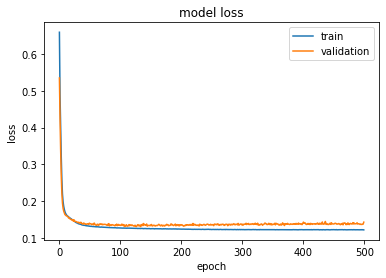

In [84]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

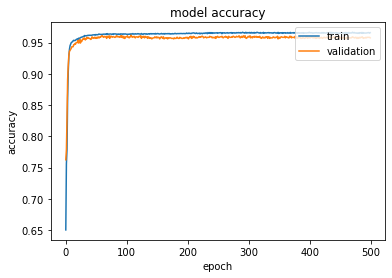

In [85]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [86]:
# Model Recall: what percentage of positive tuples are labelled as such?

y_pred = np.around(model.predict(X_test))

recall_average = recall_score(y_test,y_pred, average="micro")

print("Recall:",recall_average)

Recall: 0.961


In [87]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.961
Precision: 0.9524340770791075


In [93]:
#confusion matrix
import pandas as pd
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=['stayed', 'left'], columns=['stayed', 'left'])

<AxesSubplot:>

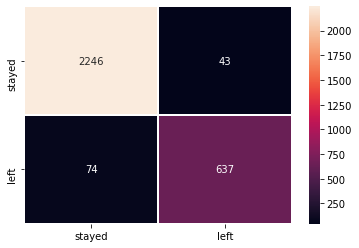

In [94]:
sns.heatmap(conf_matrix, annot=True, linewidths=1, fmt='g')

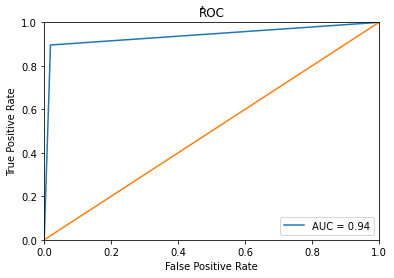

In [96]:
#roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()